In [23]:
import pandas as pd

df = pd.read_csv('C:\\Users\Boss\Desktop\weight.csv')
del df['Gender']
print(df.head())

      Height      Weight
0  73.847017  241.893563
1  68.781904  162.310473
2  74.110105  212.740856
3  71.730978  220.042470
4  69.881796  206.349801


array([[<AxesSubplot:xlabel='Height', ylabel='Height'>,
        <AxesSubplot:xlabel='Weight', ylabel='Height'>],
       [<AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='Weight', ylabel='Weight'>]], dtype=object)

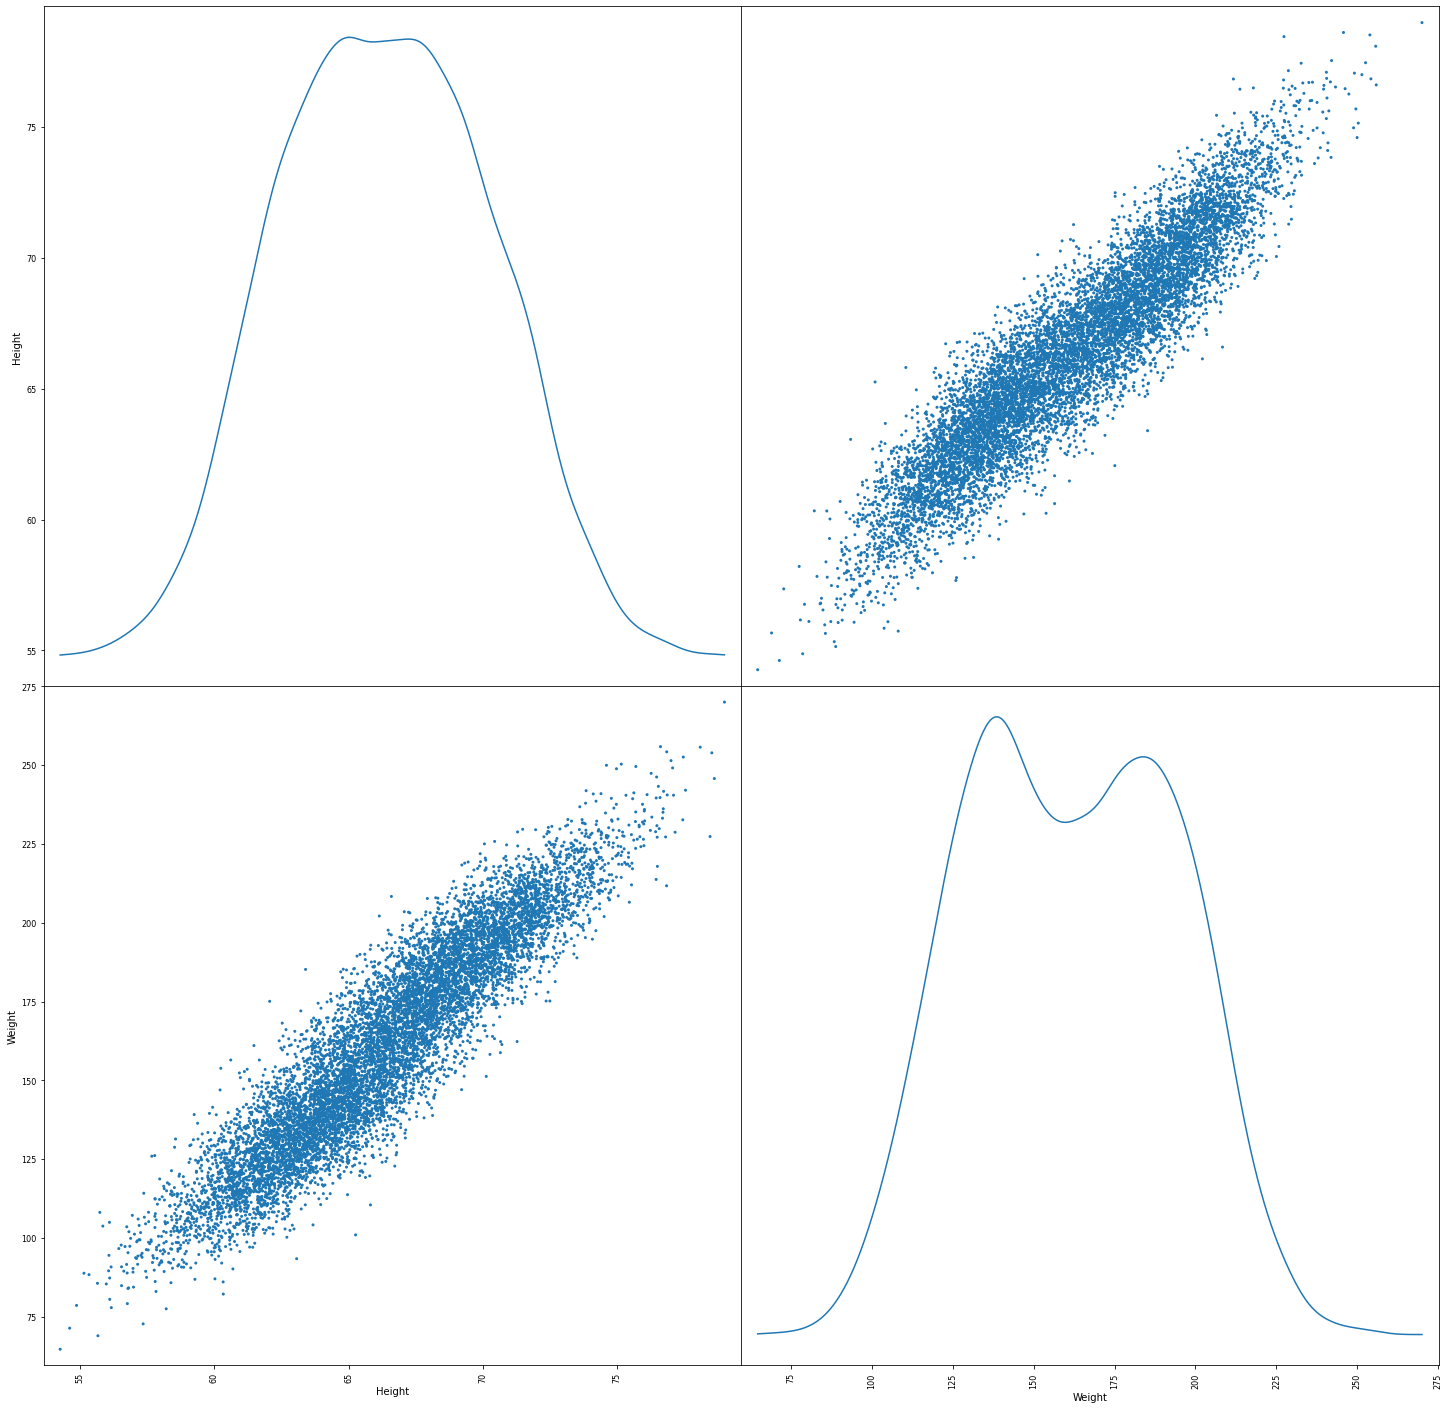

In [24]:
from pandas.plotting import scatter_matrix
df1=pd.DataFrame(df)

scatter_matrix(df1, alpha = 1, figsize = (25, 25), diagonal="kde")

In [25]:
from sklearn import linear_model

X = df[['Height']] 
Y = df['Weight']
 

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 -350.73719181541605
Coefficients: 
 [7.71728764]


C:\Users\Boss\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


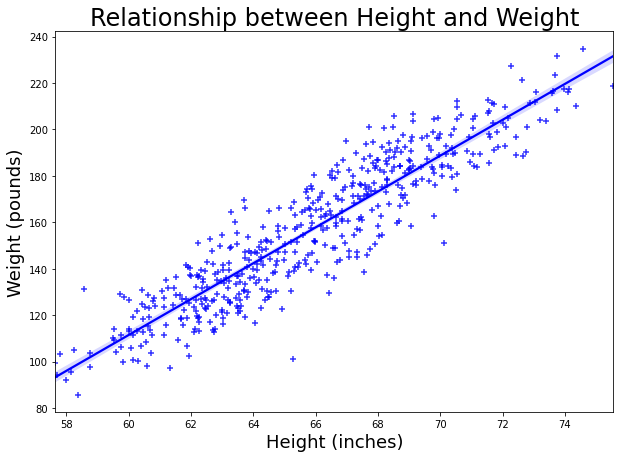

In [26]:
import seaborn as sns

df_sample = df.sample(500)

fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_sample.Height, y=df_sample.Weight, color='blue', marker='+')


plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [27]:
import statsmodels.api as sm

X = sm.add_constant(X)
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:16:23   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -350.7372      2.111   -166.109      0.0

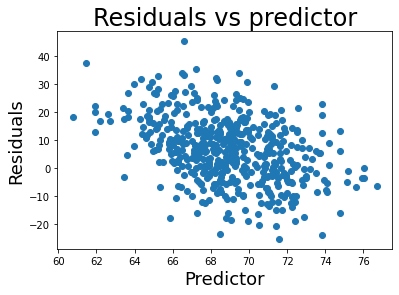

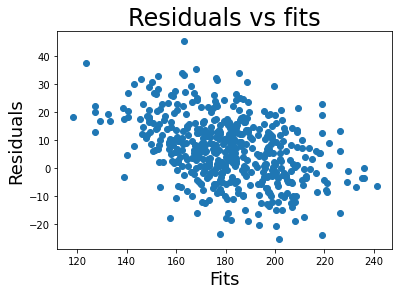

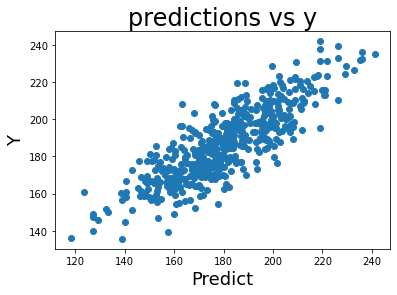

In [28]:

import matplotlib.pyplot as plt
residuals=Y-predictions
X = df[['Height']] 
plt.scatter(X[0:500], residuals[0:500])
plt.title('Residuals vs predictor', size=24)
plt.xlabel('Predictor', size=18)
plt.ylabel('Residuals', size=18);
plt.show()


plt.scatter(predictions[0:500], residuals[0:500])
plt.title('Residuals vs fits', size=24)
plt.xlabel('Fits', size=18)
plt.ylabel('Residuals', size=18);
plt.show()


X = df[['Height']] 
plt.scatter(predictions[0:500], Y[0:500])
plt.title('predictions vs y', size=24)
plt.xlabel('Predict', size=18)
plt.ylabel('Y', size=18);
plt.show()




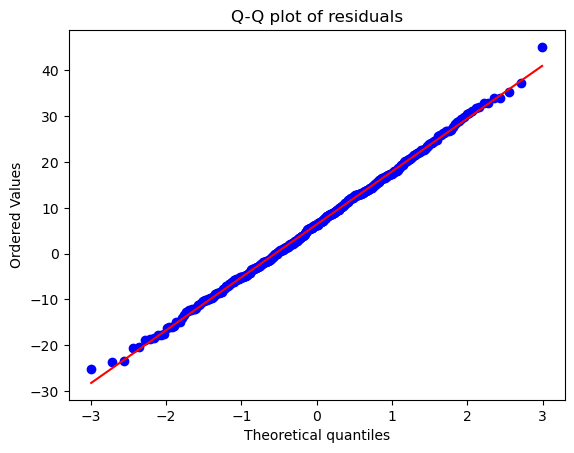

In [132]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(residuals[0:500], dist="norm", plot=pylab)
pylab.title("Q-Q plot of residuals")
pylab.show()